In [7]:
# (cmd) pip install tensorflow-gpu==2.10.0

import tensorflow as tf

tf.__version__

'2.10.0'

In [8]:
# 실행가능한 gpu 목록
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
#실행가능한 cpu, gpu 목록

from tensorflow.python.client import device_lib  

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4919343902318153246
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1383870875
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 384281178710670895
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [3]:
#기본적으로 gpu로 실행됨
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
tf.debugging.set_log_device_placement(True)

# cpu에서 실행시키는 방법: CPU라고 지정해주면 됨
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
tf.debugging.set_log_device_placement(True)

# gpu에서 실행시키는 방법: 현재는 default가 gpu에서 돌아가게 되어있음

with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
# gpu memory는 기본적으로 full size로 설정됨
# gpu 메모리를 탄력적으로 사용하는 방법

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

#gpu의 메모리를 점진적으로 늘리도록 설정
tf.config.experimental.set_memory_growth(gpus[0],True)

# 메모리 사용량을 직접 지정하는 방법
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)])
# 3가지 옵션을 바꿔가면서 gpu 메모리 사용량 확인

hello = tf.constant('Hello World')  
print(hello)  

# b: 바이트 배열 
# ascii-code: 문자 1개가 1byte  uni-code: 문자 1개가 1byte가 아님(한글: utf-8, 3bytes)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tf.Tensor(b'Hello World', shape=(), dtype=string)


지금부터는 tensorflow를 돌리면 GPU로 돌아감. 속도 면에서는 유리

### 예시) Titanic호 생존자 예측

좌석등급    1등석여부   2등석여부   3등석여부

    1           1           0           0

    2           0           1           0

    3           0           0           1


In [1]:
# 데이터 로딩
import pandas as pd
df = pd.read_csv('Data/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


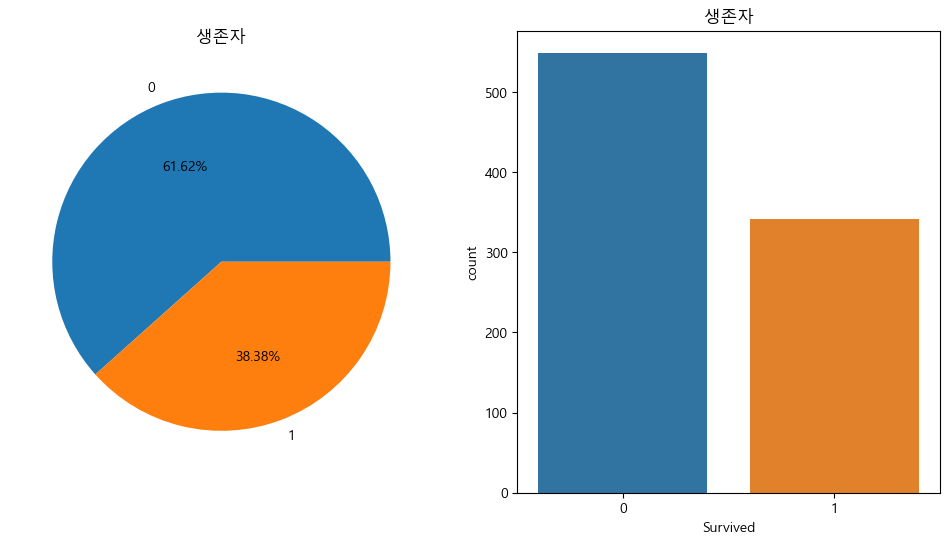

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=df, ax=ax[1])
ax[1].set_title('생존자')
plt.show()

<Axes: >

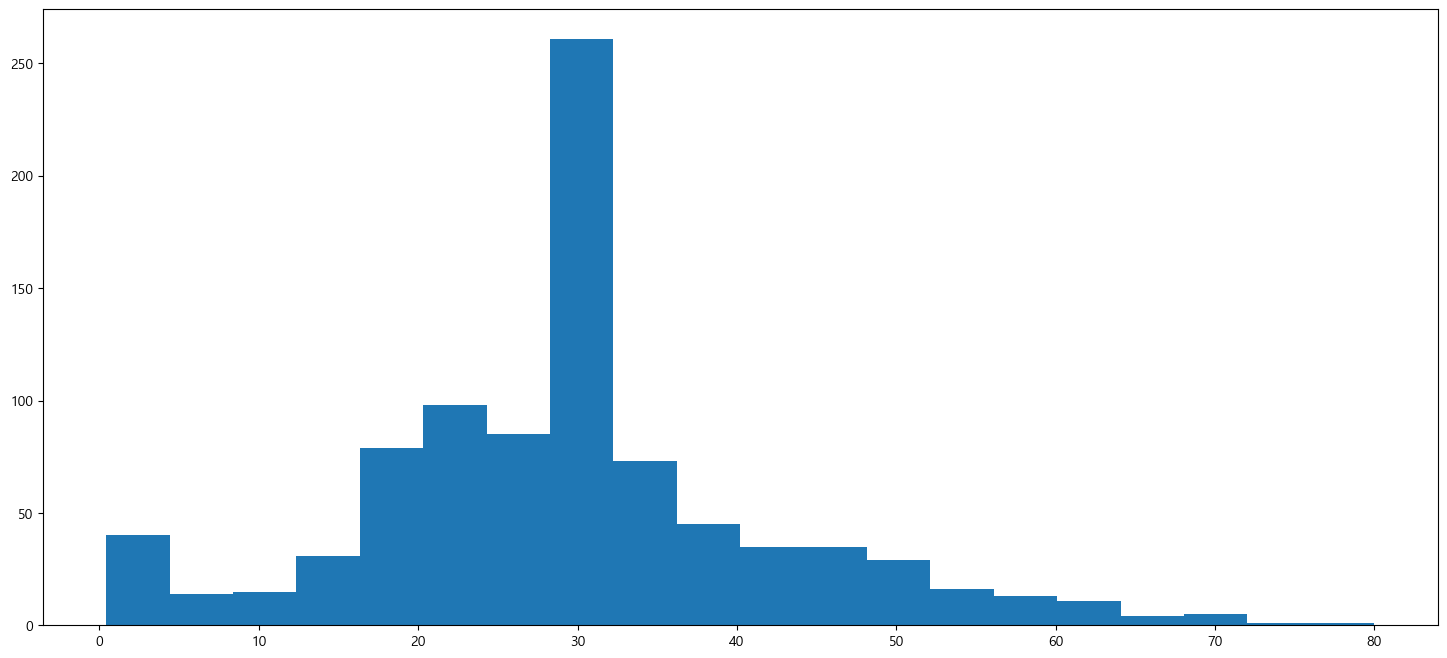

In [3]:
#승객들의 연령 분포
df['Age'].hist(bins=20,figsize=(18,8),grid=False)

In [4]:
# 객실 등급별 통계
df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [5]:
df.groupby('Pclass2').mean()

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [6]:
df.groupby('Pclass3').mean()

,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


c:\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


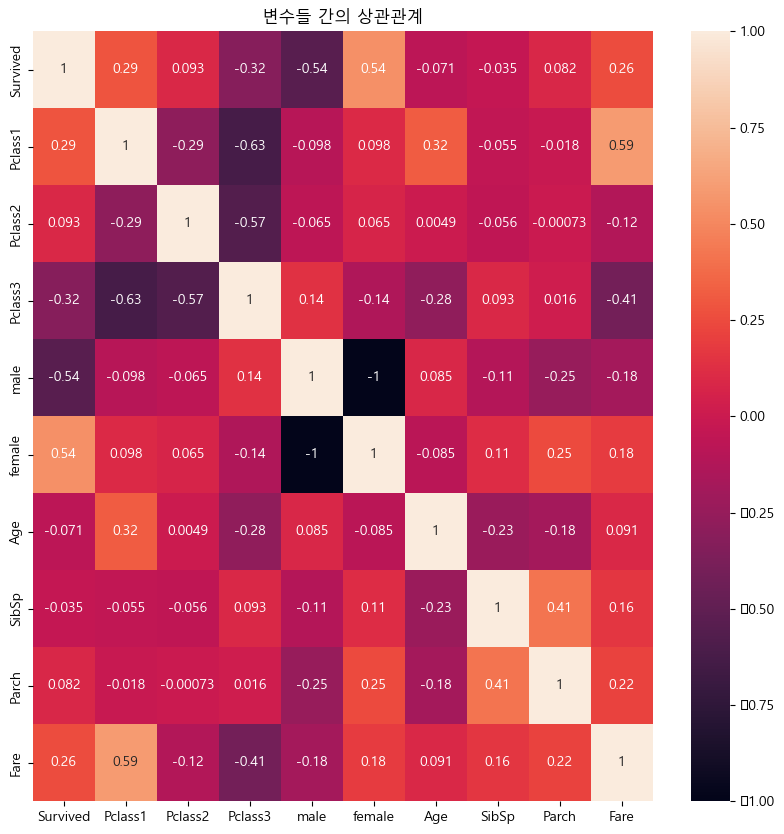

In [7]:
# 상관관계 분석
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linecolor = 'white')
plt.title('변수들 간의 상관관계')
plt.show()

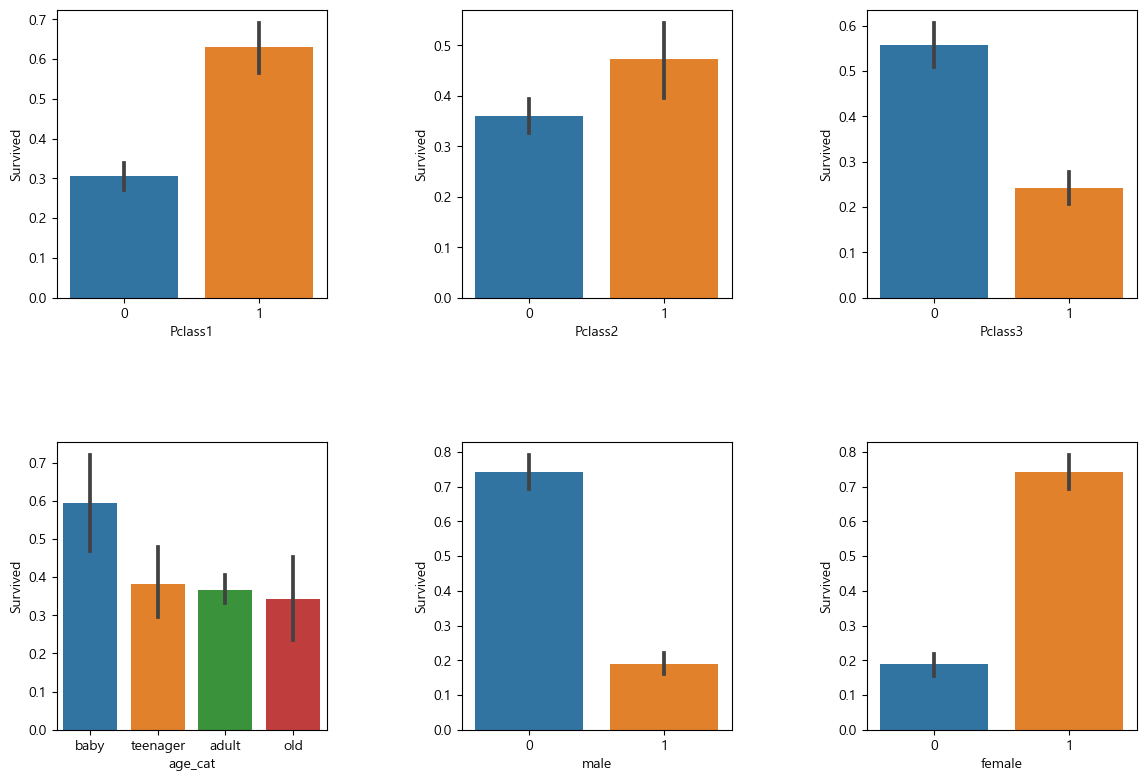

In [9]:
# 연령대 나누어 분석
df['age_cat'] = pd.cut(df['Age'], bins = [0, 10, 20, 50, 100], include_lowest=True, labels = ['baby', 'teenager', 'adult','old'])
plt.figure(figsize = (12, 8))
plt.subplot(231)

# 막대 위의 세로선은 오차범위를 의미함(기본값은 ci=95)
sns.barplot(x='Pclass1', y='Survived', data=df)
plt.subplot(232)
sns.barplot(x='Pclass2', y='Survived', data=df)
plt.subplot(233)
sns.barplot(x='Pclass3', y='Survived', data=df)
plt.subplot(234)
sns.barplot(x='age_cat', y='Survived', data=df)
plt.subplot(235)
sns.barplot(x='male',y='Survived',data=df)
plt.subplot(236)
sns.barplot(x='female',y='Survived',data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

# 1등석,2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음
# baby와 female의 생존률이 높음

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12584\1746420825.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12584\1746420825.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)


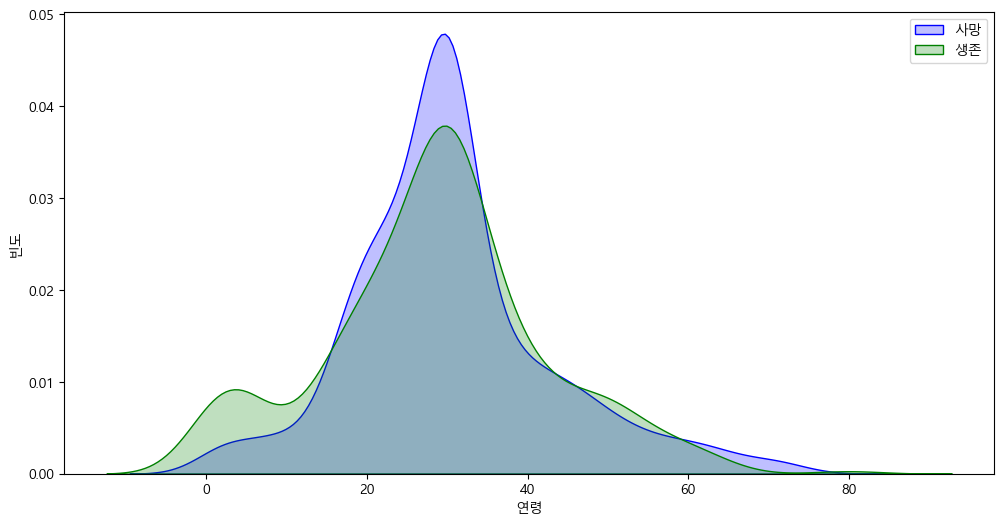

In [12]:
# 나이 분포 곡선(어린아이들의 생존률이 상대적으로 높음)
f,ax = plt.subplots(figsize=(12,6))

# 커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선
g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)
g.set_xlabel("연령")
g.set_ylabel("빈도")
g.legend(["사망","생존"])

In [13]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
train_cols=df.columns[1:-1]
X=df[train_cols] #독립변수
y=df['Survived'] #종속변수

In [15]:
# 언더샘플링

from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp.head(3)

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare,Survived
134,0,1,0,1,0,25.0,0,0,13.000,0
719,0,0,1,1,0,33.0,0,0,7.775,0
149,0,1,0,1,0,42.0,0,0,13.000,0


In [16]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"] # 종속변수

In [17]:
# 데이터셋 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)


In [18]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))   # 이진분류
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

### input   hidden-1    hidden-2    hidden-3    output
###   9       128         64          64          1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________


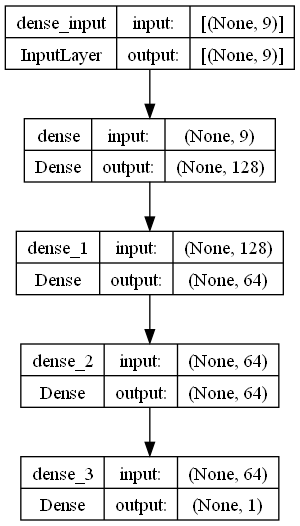

In [19]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

<Axes: >

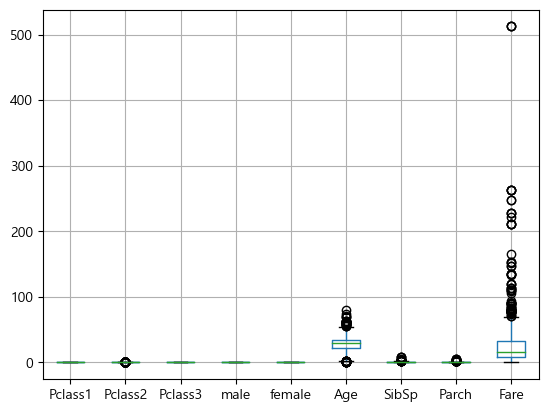

In [20]:
X_train.boxplot()

<Axes: >

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


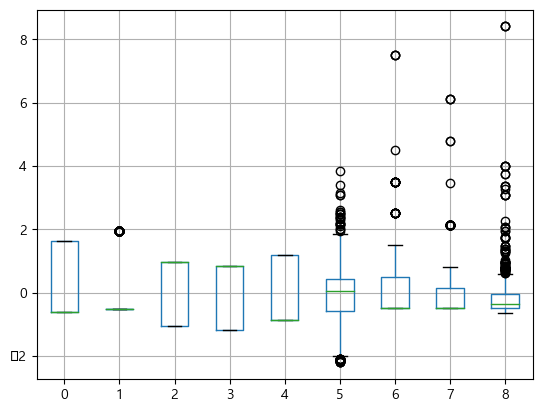

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 넘파이 배열로 바뀜
# 넘파이 배열 => 데이터프레임
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
X_train_scaled.boxplot()

In [23]:
# 모델도 저장하지만, scaler도 저장해야 함
# pickle이나 joblib 이용

from joblib import dump
dump(scaler, 'Data/titanic/scaler.model', compress=True)  

['Data/titanic/scaler.model']

Epoch 1/500
18/18 [==============================] - 1s 7ms/step - loss: 0.2186 - accuracy: 0.7221
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1609 - accuracy: 0.7806
Epoch 3/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1445 - accuracy: 0.7971
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1394 - accuracy: 0.8099
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.8190
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.8227
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.8336
Epoch 8/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1295 - accuracy: 0.8263
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.8391
Epoch 10/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.8336
Epoch 11/

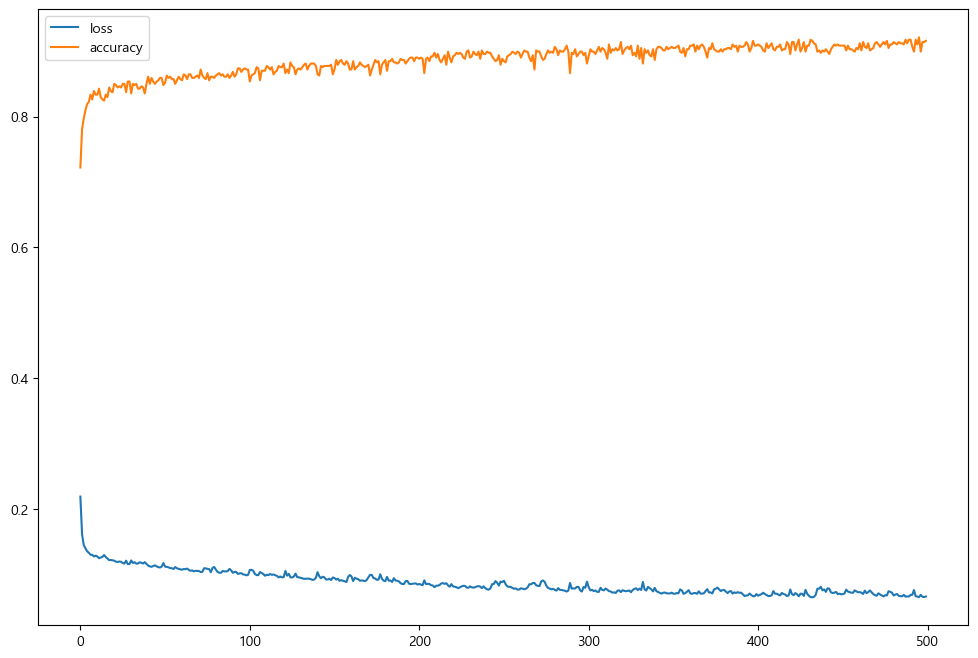

In [24]:
#모델 학습

hist = model.fit(X_train_scaled, y_train, epochs=500)
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()

In [25]:
# 모델 평가

# 학습용
scores = model.evaluate(X_train_scaled, y_train, verbose=1)  # 스케일링된 데이터를 넣어서 평가해야 함
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) 

# 검증용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) 

18/18 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9177
[0.06118796765804291, 0.9177330732345581]
accuracy: 91.77%
5/5 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.7591
[0.20106373727321625, 0.7591241002082825]
accuracy: 75.91%


In [26]:
# 새로운 데이터 넣어서 평가
# 1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금

# person1: 3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]

# person2: 1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

# person3: 2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70
person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

# 스케일링
person1=scaler.transform(person1)
person2=scaler.transform(person2)
person3=scaler.transform(person3)

# 예측
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))


1/1 [==============================] - 0s 86ms/step
[[0.0082813]]
1/1 [==============================] - ETA: 0s

c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
[[0.999998]]
1/1 [==============================] - 0s 19ms/step
[[1.]]


In [27]:
# 모형을 지정한 디렉토리에 저장
model.save('Data/titanic/titanic.h5')

In [ ]:
### 신경망 모델 시각화해서 살펴보기
# netron 다운로드 및 테스트  
# https://github.com/lutzroeder/netron
# https://github.com/lutzroeder/netron/releases/tag/v7.0.4 에서 NETRON 다운로드받아 설치
# 저장한 모델 열기 > 시각화